In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
import cufflinks as cf

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

zad 1

<Axes: >

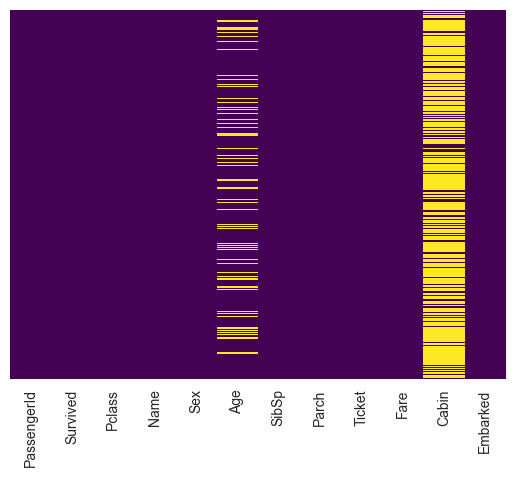

In [124]:
dsp6 = pd.read_csv('datasets/DSP_6.csv')
dsp6.isnull().sum()
sns.heatmap(dsp6.isnull(), yticklabels=False, cbar =False, cmap="viridis")


In [125]:
dsp6.drop(columns=["Cabin"], inplace=True)

In [126]:
dsp6.fillna(dsp6.mean(numeric_only=True),inplace=True)

<Axes: >

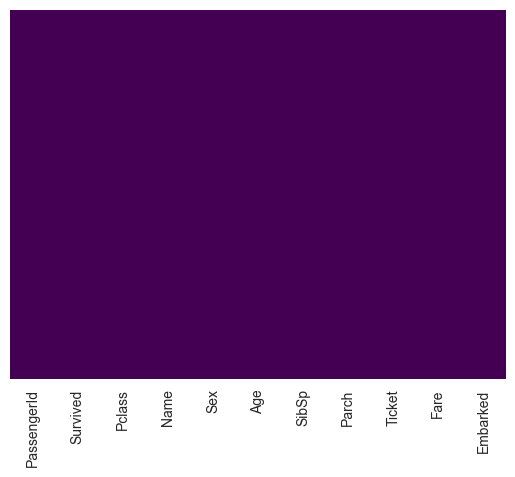

In [127]:
sns.heatmap(dsp6.isnull(), yticklabels=False, cbar =False, cmap="viridis")

In [128]:
dsp6.dropna(inplace=True)

<Axes: >

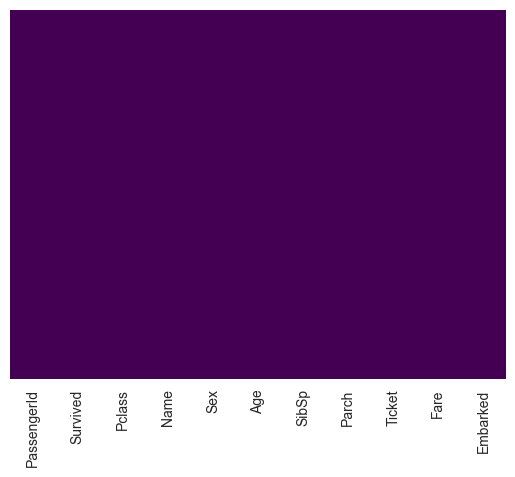

In [129]:
sns.heatmap(dsp6.isnull(), yticklabels=False, cbar =False, cmap="viridis")

zad2

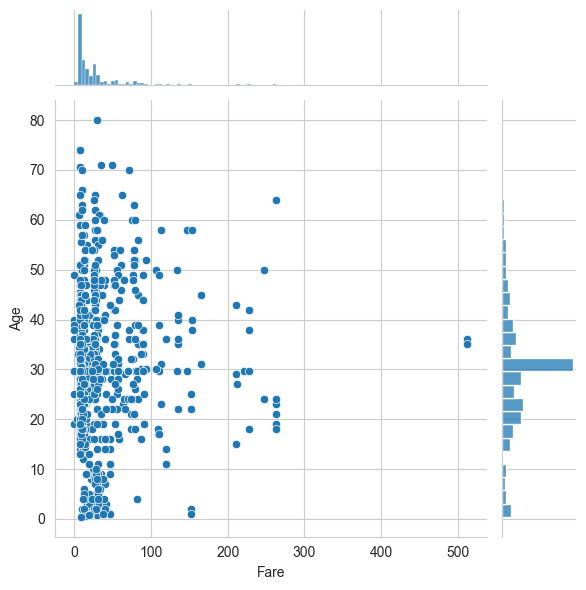

In [130]:
sns.jointplot(x='Fare',y='Age',data=dsp6)

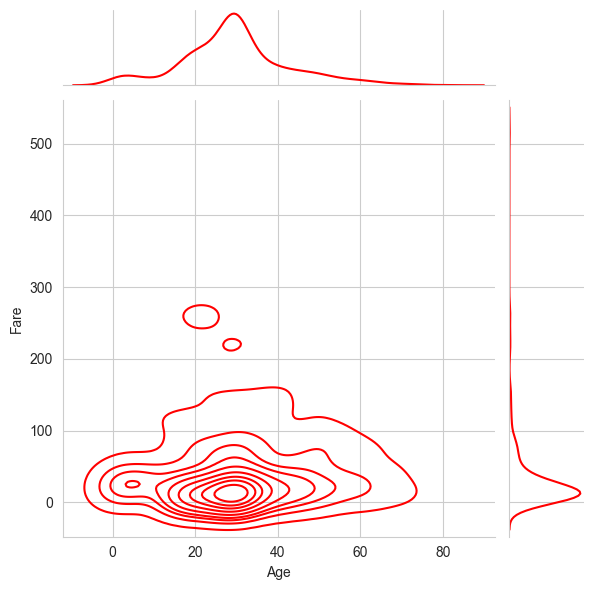

In [131]:
sns.jointplot(x="Age",y="Fare",data=dsp6, color="red", kind="kde")

<Axes: xlabel='Survived', ylabel='count'>

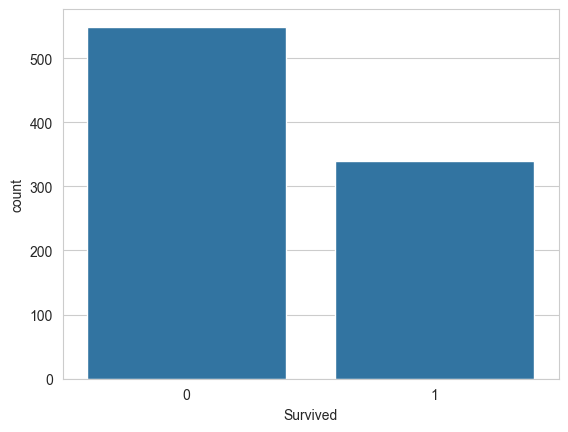

In [132]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=dsp6)

<Axes: xlabel='Survived', ylabel='count'>

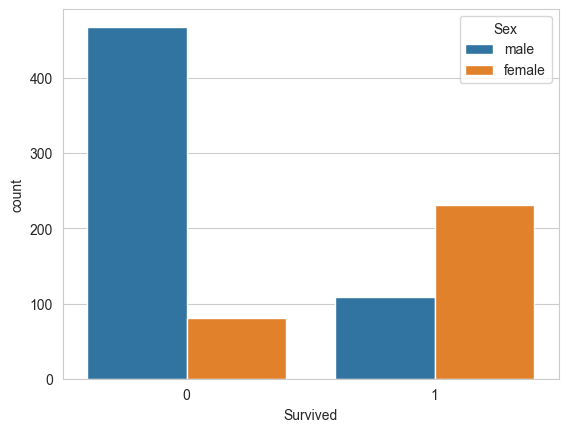

In [133]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Sex",data=dsp6)

<Axes: xlabel='Survived', ylabel='count'>

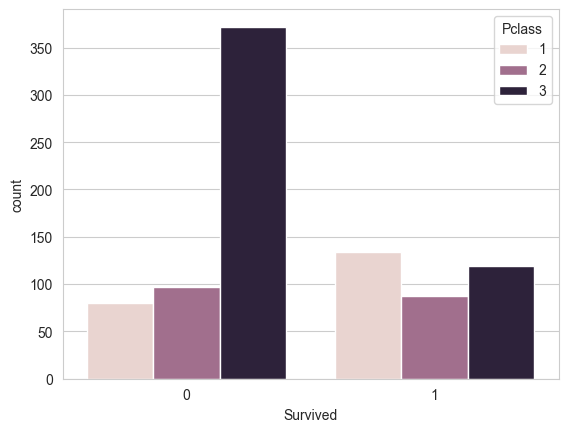

In [134]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Pclass",data=dsp6)

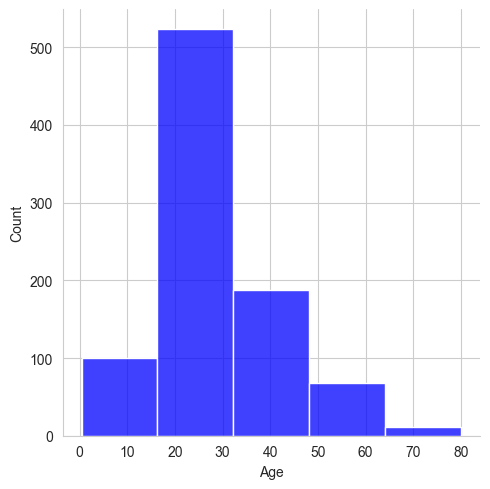

In [135]:
sns.displot(dsp6["Age"],kde=False, color="blue", bins=5)

<Axes: xlabel='Pclass', ylabel='Age'>

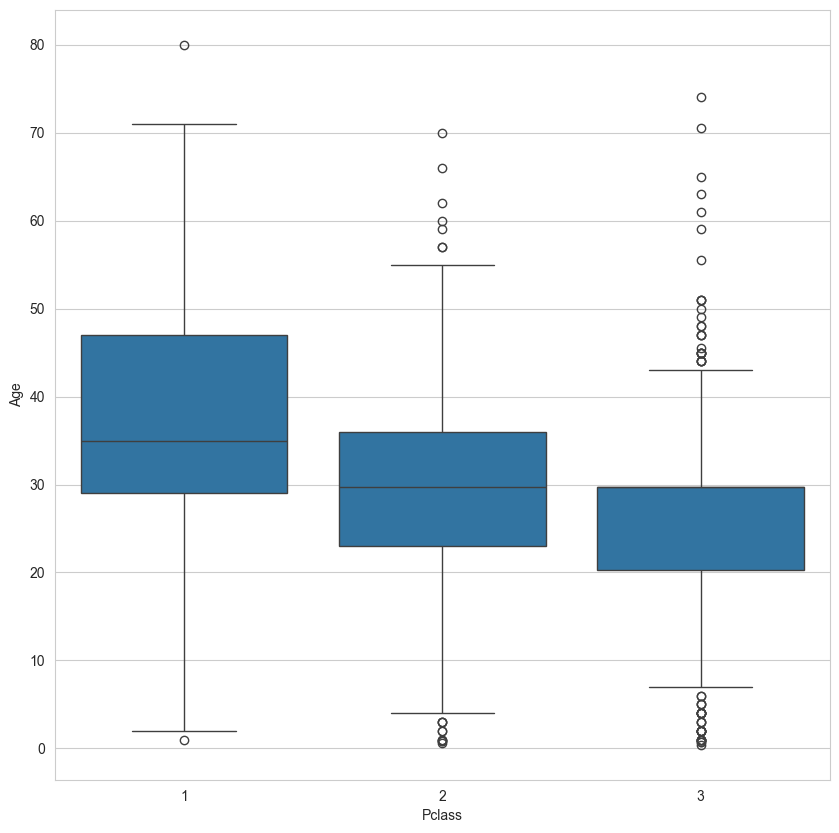

In [136]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Pclass",y="Age",data=dsp6)

In [137]:
cf.go_offline()

In [138]:

#dsp6["Age"].iplot(kind="hist", bins=20, color="green") to nie działa bo na starsze wersjo to jest

In [139]:
Sex = pd.get_dummies(dsp6["Sex"],drop_first=True)
embark = pd.get_dummies(dsp6["Embarked"],drop_first=True)

In [140]:
Sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [141]:
data = pd.concat([dsp6,Sex,embark],axis=1)

In [142]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,True,False,False


In [143]:
data.drop(["Sex", "Embarked", "Ticket", "PassengerId", "Name"],axis=1, inplace=True)

Model Regresja Logistyczna

In [144]:
data = data[(np.abs(stats.zscore(data.astype(float))) < 3).all(axis=1)]

<Axes: xlabel='Pclass', ylabel='Fare'>

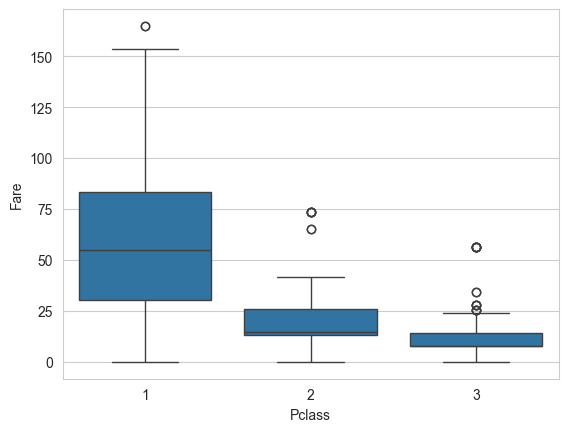

In [145]:
sns.boxplot(x="Pclass",y="Fare",data=data)

In [146]:
x = data.drop("Survived", axis=1)
y = data["Survived"]

In [147]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.10,random_state=101)

In [148]:
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [149]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        60
           1       0.62      0.67      0.65        15

    accuracy                           0.85        75
   macro avg       0.77      0.78      0.78        75
weighted avg       0.86      0.85      0.86        75



In [150]:
confusion_matrix(y_test, predictions)

array([[54,  6],
       [ 5, 10]])

In [151]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=101)

In [152]:
logmodel1 = LogisticRegression(max_iter=500)
logmodel1.fit(X_train,y_train)
predictions = logmodel1.predict(X_test)
print(classification_report(y_test,predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       160
           1       0.60      0.63      0.62        65

    accuracy                           0.77       225
   macro avg       0.73      0.73      0.73       225
weighted avg       0.78      0.77      0.77       225



array([[133,  27],
       [ 24,  41]])

In [153]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=101)

In [154]:
logmodel2 = LogisticRegression(max_iter=500)
logmodel2.fit(X_train,y_train)
predictions = logmodel2.predict(X_test)
print(classification_report(y_test,predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       112
           1       0.57      0.71      0.64        38

    accuracy                           0.79       150
   macro avg       0.73      0.77      0.75       150
weighted avg       0.81      0.79      0.80       150



array([[92, 20],
       [11, 27]])

Zmieniają się wartości przy zwiększonym test size zmniejszają się wyniki, a przy zmniejszonych iteracjach tak samo. F1-score wychodzi nadal wysoki jednak w obu przypadkach się zmniejsza, precyzja także spada w obu przypadkach.

Zadanie 4

In [173]:
dsp2 = pd.read_csv('datasets/DSP_2.csv')
logmodel_zad4 = LogisticRegression(max_iter=500)

In [174]:
dsp2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [175]:

dsp2 = pd.get_dummies(dsp2, columns=['Sex','ChestPainType','RestingECG','ST_Slope'])
dsp2 = dsp2.replace({'Y': True, 'N': False})

C:\Users\halt3\AppData\Local\Temp\ipykernel_8332\107602568.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [176]:
dsp2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,False,0.0,0,False,True,False,True,False,False,False,True,False,False,False,True
1,49,160,180,0,156,False,1.0,1,True,False,False,False,True,False,False,True,False,False,True,False
2,37,130,283,0,98,False,0.0,0,False,True,False,True,False,False,False,False,True,False,False,True
3,48,138,214,0,108,True,1.5,1,True,False,True,False,False,False,False,True,False,False,True,False
4,54,150,195,0,122,False,0.0,0,False,True,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,False,1.2,1,False,True,False,False,False,True,False,True,False,False,True,False
914,68,144,193,1,141,False,3.4,1,False,True,True,False,False,False,False,True,False,False,True,False
915,57,130,131,0,115,True,1.2,1,False,True,True,False,False,False,False,True,False,False,True,False
916,57,130,236,0,174,False,0.0,1,True,False,False,True,False,False,True,False,False,False,True,False


In [177]:
x = dsp2.drop("HeartDisease", axis=1)
y = dsp2["HeartDisease"]

In [178]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=101)

In [179]:
logmodel_zad4.fit(X_train,y_train)
predictions = logmodel_zad4.predict(X_test)
print(classification_report(y_test,predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        79
           1       0.84      0.85      0.84       105

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



c:\Users\halt3\Desktop\lista 2 s25228\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([[62, 17],
       [16, 89]])

Uważam że dla takich badań które są tutaj przedstawione, nie jest wystarczająco dobry wynik, ma on precyzję dla prawdy 0.84 czyli nie trafia w 0.16 przypadków, co mogłoby oznaczać zlekceważenie przypadku jednego z pacjentów, jeżeliby brać ten model po uwagę, a są lepsze metody badania serca niż te które są tu przedstawione.